In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.datasets
from sklearn.metrics import mean_absolute_error,r2_score, accuracy_score

In [ ]:
house_data = sklearn.datasets.fetch_california_housing()
print(house_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
#adding house dataset to dataframe
df = pd.DataFrame(house_data.data , columns = house_data.feature_names)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
#inserting the target columns in df
df["price"] = house_data.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#printing the shape
print(df.shape)


(20640, 9)


In [ ]:
#checking the null values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [ ]:
# appling the statistical operations
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
#makeing the corelation
corr = df.corr()

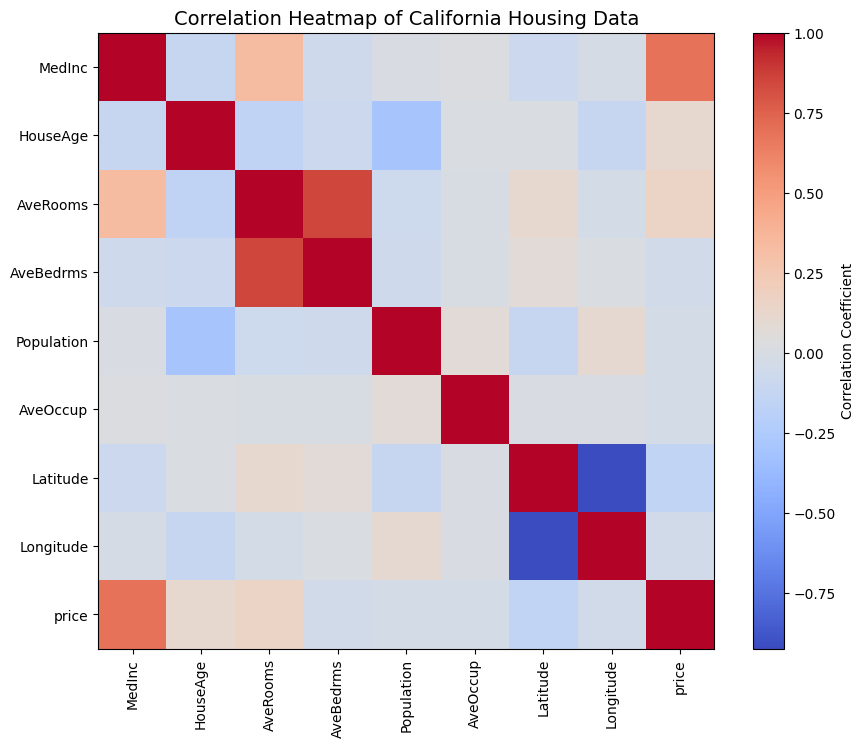

In [ ]:
#constructing the heat map using matplotlib
# Plot heatmap with matplotlib
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")

# Add ticks and labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap of California Housing Data", fontsize=14)
plt.show()

In [ ]:
# training the model
X = df.drop(['price'], axis = 1)
y = df['price']


In [ ]:
# using the model selection
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


In [ ]:
#print thr size of all
print(X.shape, X_train.shape, X_test.shape )

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
#training the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting the Xtrain and calculatin the score
X_train_pred = model.predict(X_train)

In [ ]:
# printing the Mean scored error and r2 score
mae_1 = mean_absolute_error(y_train, X_train_pred)
r2_1 = r2_score(y_train, X_train_pred)

print('Mean absolute error = ', mae_1)
print('r2_score = ', r2_1)

Mean absolute error =  0.5303857028686891
r2_score =  0.6068205998456939


In [ ]:
#predicting the Xtrain and calculatin the score
X_test_pred = model.predict(X_test)


In [ ]:
# printing the Mean scored error and r2 score
mae_2 = mean_absolute_error(y_test, X_test_pred)
r2_2 = r2_score(y_test, X_test_pred)

print('Mean absolute error = ', mae_2)
print('r2_score = ', r2_2)

Mean absolute error =  0.5358292549657769
r2_score =  0.6013853272055152


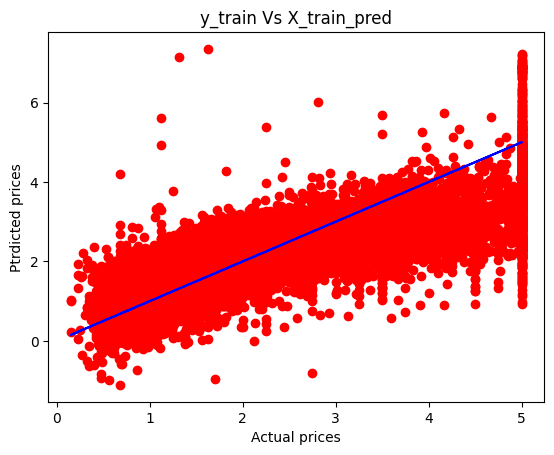

In [ ]:
#ploting the graph between ytrain and pres x train
plt.figure()
plt.scatter(y_train, X_train_pred, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.xlabel('Actual prices')
plt.ylabel('Ptrdicted prices')
plt.title('y_train Vs X_train_pred')
plt.show()

In [ ]:
# df.to_csv('housing.csv', index=False)
# from google.colab import files
# files.download('housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [ ]:
input_data = []
for col in df.columns:
  if col == 'price':
    continue
  input_values = float(input(f"enter the value for {col} = "))
  input_data.append(input_values)

print(input_data)

enter the value for MedInc = 5.8374
enter the value for HouseAge = 36
enter the value for AveRooms = 5.438202
enter the value for AveBedrms = 0.964419
enter the value for Population = 1463
enter the value for AveOccup = 2.7397
enter the value for Latitude = 33.91
enter the value for Longitude = -118.38
[5.8374, 36.0, 5.438202, 0.964419, 1463.0, 2.7397, 33.91, -118.38]


In [ ]:
input_data

[5.8374, 36.0, 5.438202, 0.964419, 1463.0, 2.7397, 33.91, -118.38]

In [ ]:
id_array = np.asarray(input_data)
id_array_reshape = id_array.reshape(1, -1)

pred = model.predict(id_array_reshape)
print(pred)
pred_price = pred[0]
print(pred_price)

[3.1246994]
3.124699398170378


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
# X = df.drop("Price", axis=1)
# y = df["Price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(id_array_reshape)
print(y_pred)


[79.26606622]
